In [5]:

%matplotlib inline
# standard
from collections import Counter
import os
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
warnings.simplefilter("ignore", FutureWarning)

# datos y numerica
import numpy as np
import pandas as pd

# visualización
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='ticks', context='talk')


### Comenzemos levantando el conjunto de datos serializado, y dando u primer vistazo

In [32]:
df = pd.read_pickle('master_1.df')
df.shape

(28059, 46)

In [16]:
df.head()

,id,pub_title,seller_registration_date,seller_reputation_level,power_seller_status,seller_ratings_negative,seller_ratings_neutral,seller_ratings_positive,seller_transactions_total,seller_sales_completed,...,original_price,domain,catalog_listing,shipping_free_shipping,shipping_mode,seller_address_state_name,seller_contact_webpage,n_attributes,item_visits,user_visits
0,MLA871657598,Smart Tv Rca X55andtv Led 4k 55 100v/240v,2016-10-04 15:46:28-04:00,5,platinum,0.0,0.0,0.0,12283.0,1965.0,...,NaN,TELEVISIONS,True,False,not_specified,Buenos Aires,NaN,30,34,438015
1,MLA885144534,Smart Tv Philips 6600 Series 50pud6654/77 Led ...,2016-10-04 15:46:28-04:00,5,platinum,0.0,0.0,0.0,12283.0,1965.0,...,NaN,TELEVISIONS,True,True,me2,Buenos Aires,NaN,33,352,438015
2,MLA910600162,Smart Tv Samsung Series 7 Un43tu7000gczb Led 4...,2013-07-31 08:14:50-04:00,3,NaN,0.0,0.0,0.0,86020.0,12295.0,...,NaN,TELEVISIONS,True,False,custom,Capital Federal,NaN,36,1071,1369576
3,MLA895877679,Tv Box Noga Pc Ultra Estándar 4k 8gb Negro C...,2002-04-13 02:00:00-04:00,5,platinum,0.0,0.0,0.0,19134.0,2956.0,...,NaN,STREAMING_MEDIA_DEVICES,True,True,me2,Buenos Aires,NaN,29,1528,116539
4,MLA877436109,Smart Tv Tedge Ntv504k Led 4k 50 220v,2019-03-19 08:41:57-04:00,5,platinum,0.0,0.0,0.0,367677.0,60652.0,...,48999.0,TELEVISIONS,True,True,me2,Buenos Aires,NaN,58,44250,3444269


Podemos ver que se trata de una matriz de 28059 filas y 46 columnas. 
A simple vista se ven varias variables a limpiar, analizar correlaciones y/o transformar.
Empezemos mirando los tipos de datos en las columnas, que tengan su tipo de dato correcto.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28059 entries, 0 to 28058
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype                                 
---  ------                         --------------  -----                                 
 0   id                             28059 non-null  object                                
 1   pub_title                      28059 non-null  object                                
 2   seller_registration_date       27924 non-null  datetime64[ns, pytz.FixedOffset(-240)]
 3   seller_reputation_level        25003 non-null  object                                
 4   power_seller_status            21615 non-null  object                                
 5   seller_ratings_negative        27924 non-null  float64                               
 6   seller_ratings_neutral         27924 non-null  float64                               
 7   seller_ratings_positive        27924 non-null  float64             

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28059 entries, 0 to 28058
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype                                 
---  ------                         --------------  -----                                 
 0   pub_title                      28059 non-null  object                                
 1   seller_registration_date       27924 non-null  datetime64[ns, pytz.FixedOffset(-240)]
 2   seller_reputation_level        25003 non-null  object                                
 3   power_seller_status            21615 non-null  object                                
 4   seller_ratings_negative        27924 non-null  float64                               
 5   seller_ratings_neutral         27924 non-null  float64                               
 6   seller_ratings_positive        27924 non-null  float64                               
 7   seller_transactions_total      27924 non-null  float64             

In [34]:
av_quant = df.available_quantity.values[:,0]
sold_quant = df.sold_quantity.values[:,0]
df = df.drop(['available_quantity', 'sold_quantity'], axis=1)


In [35]:
item_id = df.id.values[:,0]
df = df.drop('id', axis=1)


In [36]:
df['sold_quantity'] = sold_quant
df['available_quantity'] = av_quant

#### Sigamos mirando la cantidad de valores faltantes NaNs por variable, en terminos absolutos y relativos

In [37]:
col_nan = {c:{'abs':None, 'relative':None} for c in df.columns}
for c in df.columns:
    col_nan[c]['abs'] = df[df[c].isna()].shape[0]
    col_nan[c]['relative'] = round(df[df[c].isna()].shape[0] / df.shape[0], 4)
print(col_nan)

{'pub_title': {'abs': 0, 'relative': 0.0}, 'seller_registration_date': {'abs': 135, 'relative': 0.0048}, 'seller_reputation_level': {'abs': 3056, 'relative': 0.1089}, 'power_seller_status': {'abs': 6444, 'relative': 0.2297}, 'seller_ratings_negative': {'abs': 135, 'relative': 0.0048}, 'seller_ratings_neutral': {'abs': 135, 'relative': 0.0048}, 'seller_ratings_positive': {'abs': 135, 'relative': 0.0048}, 'seller_transactions_total': {'abs': 135, 'relative': 0.0048}, 'seller_sales_completed': {'abs': 136, 'relative': 0.0048}, 'seller_claims_value': {'abs': 137, 'relative': 0.0049}, 'seller_claims_rate': {'abs': 136, 'relative': 0.0048}, 'seller_cancellations_rate': {'abs': 137, 'relative': 0.0049}, 'seller_cancellations_value': {'abs': 137, 'relative': 0.0049}, 'seller_delayed_handling_value': {'abs': 137, 'relative': 0.0049}, 'seller_delayed_handling_rate': {'abs': 136, 'relative': 0.0048}, 'sale_price': {'abs': 28059, 'relative': 1.0}, 'buying_mode': {'abs': 0, 'relative': 0.0}, 'listi

#### Visualicémoslo para darnos una intuicion de como estamos

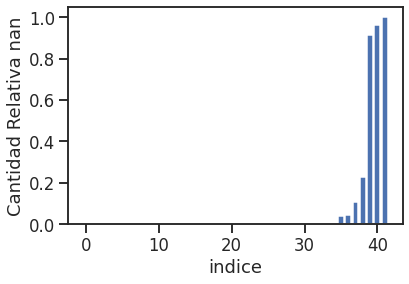

In [38]:
col_nan_rel_sort = np.sort([col_nan[k]['relative'] for k in col_nan])

plt.bar(x=list(range(len(col_nan_rel_sort))), height=col_nan_rel_sort)
plt.xlabel('indice')
plt.ylabel('Cantidad Relativa nan')
plt.show()

#### Vemos que, independientemente de los valores índice del eje X, hay tres variables con 
#### gran proporcion de valores faltantes. Las deberemos podar del conjunto de datos ya que 
#### es demasiado elevado para realizar una imputacion, dado que por lo meos aun, no queremos hacer 
#### un resampleo de aumentacion de los datos. Y estas variables son:


In [41]:
for k, v in col_nan.items():
    if v['relative'] > .6:
        print(f"{k} tiene {v['relative']} faltantes")

sale_price tiene 1.0 faltantes
original_price tiene 0.9157 faltantes
seller_contact_webpage tiene 0.9626 faltantes


#### Como bien sabemos de la documentacion del presente desafío, el campo _"original_price"_ esta null cuando no tiene precio con descuento. Por lo que hay hay solo un %8.5 de observaciones con descuento: la dejaremos como variable indicadora del mismo. Luego _"seller_contact_webpage"_ y _"sale_price"_ tienen una proporcion muy alta de faltantes, por lo tanto las quitaremos.

In [43]:
df = df.drop(['sale_price', 'seller_contact_webpage'], axis=1)
df['original_price'] = df['original_price'].fillna(0)  

#### Sigamos con una visualización tipo _heatmap_ del coeficiente de correlacion entre las variables numéricas:

<AxesSubplot:>

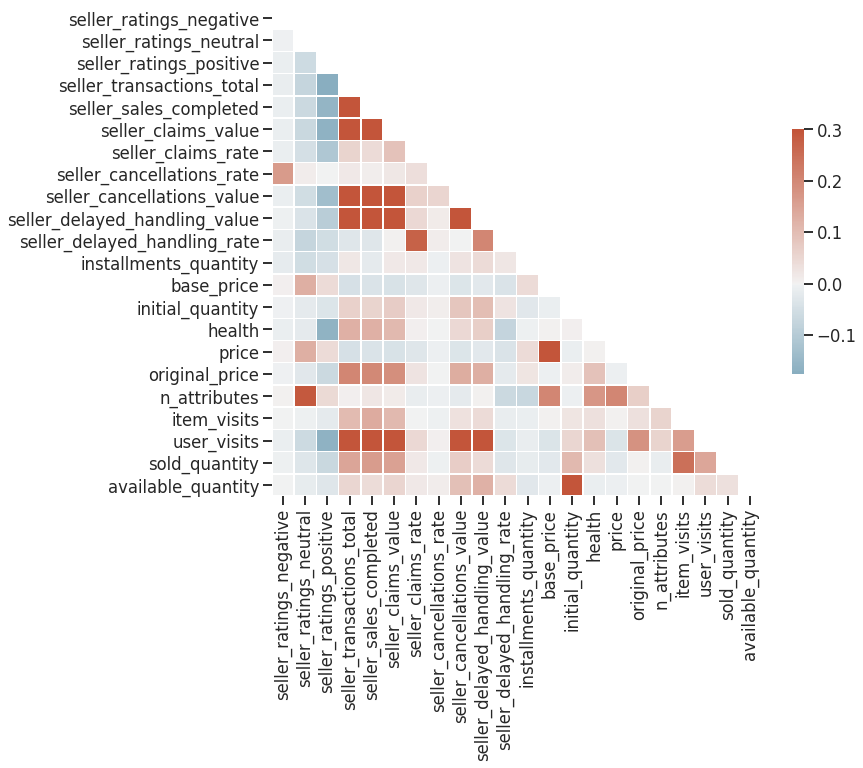

In [44]:
corr = df.select_dtypes(include=['float64', 'int64']).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### Vemos en muchos casos lo esperable en cuanto a variables que hablan de cosas parecidas: 
* price <-> base_price: tienen alta correlacion positiva
* initial_quantity <-> available_quantity: tienen correlacion positiva
* seller_sales_completed <-> seller_transactions_total
#### Luego vemos otras mas interesantes, que podrian ser esperables, pero nada es obvio:
* seller_delayed_handling_rate <-> seller_claims_rate: Es decir, la tasa de retraso en la entrega esta positivamente relacionada con la tasa de reclamos al vendedor. Es esperable, pero aqui la evidencia lo apoya.
* seller_ratings_negative <-> seller_cancellations_rate: la correlacion en este caso no es tan potente, tambien esperable.
#### Llama la atencion una banda de correlaciones negativas a lo largo de la variable _"seller_ratings_positive"_ . Pareciera que la evidencia de estos datos apoyan la idea de que a medida de que las ventas completadas y/o transacciones efectuadas crecen, decrece el rating positivo. Podria pensarse que los vendedores, a medida que realizan mas operaciones, mas se exponen a malas evaluaciones de parte de los compradores. 
#### Habría que resaltar la cantidad de variables correlacionadas positivamente con _"user_visits"_ . Esta relacionado positivamente con cancelaciones, demoras y variables que expresan operaciones concretadas. ¿Podria ser una variable que resume información de otras? Habra que tener esto en cuenta para los modelos a entrenar, especialmente en los basados en regresion lineal generalizados. 
#### Por último, sobre la variable objetivo de este trabajo, _"sold_quantity"_ tiene algunas correlaciones parecidas a la mencionada _"user_visits"_ , pero no tan potentes. La variable que mas se correlaciona positivamente es _"item_visits"_ . Esto indica que podría ser una importante variable para la su predicción y explicación. Veremos mas adelante. 

<AxesSubplot:xlabel='price'>

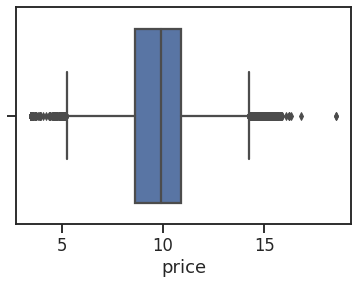

In [73]:
sns.boxplot(x=np.log(df.price))

/home/ramon/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:2015: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


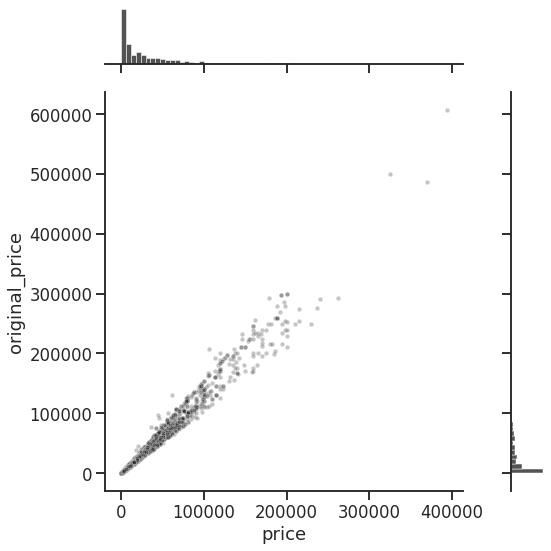

In [83]:
sns.jointplot(x='price', y='original_price', data=df[df.original_price.notna()], size=8, alpha=.25,
              color='k', marker='.')
plt.tight_layout()

In [116]:
dfg = df[['price', 'domain']].groupby('domain').mean().sort_values(by=['price']).reset_index()
dfg['idx'] = dfg.index
dfg

,domain,price,idx
0,VOLTAGE_REGULATORS,1.762150e+02,0
1,DJ_CASES,2.740000e+02,1
2,SCREWS,2.924900e+02,2
3,TELEPHONY_AND_RADIO_COMMUNICATION_PRODUCTS,2.990000e+02,3
4,POWER_CORDS,3.134286e+02,4
...,...,...,...
148,FOOD_PROCESSORS,1.664000e+05,148
149,DIGITAL_PIANOS,3.249737e+05,149
150,DJ_MIXERS,4.884796e+05,150
151,DRONES,5.819568e+05,151


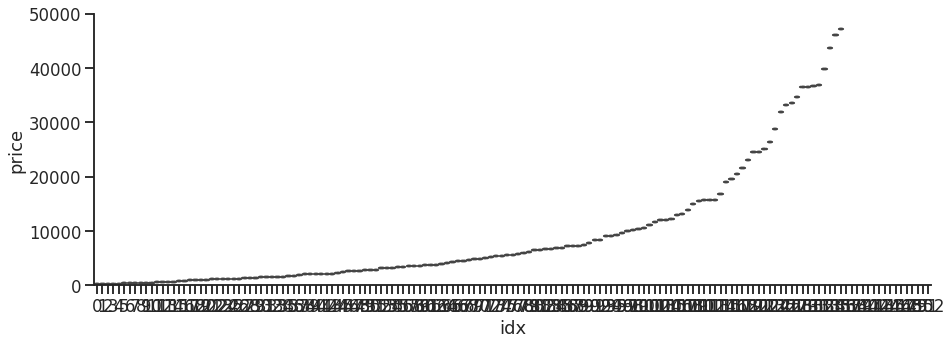

In [122]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(x='idx', y='price', data=dfg, ax=ax)
ax.set_ylim(0, 50000)
sns.despine()

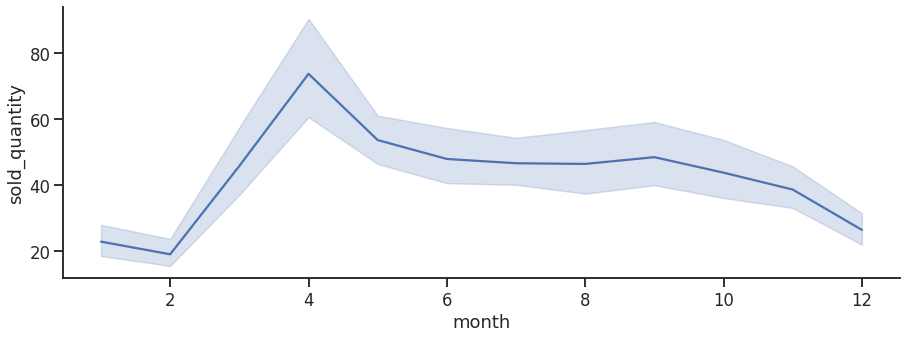

In [131]:
plt.figure(figsize=(15, 5))
(df[['stop_time', 'start_time', 'price', 'sold_quantity']]
    .dropna()
    .assign(month=lambda x: x.start_time.dt.month)
    #.query('5 < sold_quantity < 600')
    .pipe((sns.lineplot, 'data'), 'month', 'sold_quantity'))
sns.despine()